In [38]:
%reload_ext autoreload
%autoreload 2

import cv2
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

from os import path
from utilities.patches import *


from jupyterthemes import jtplot
jtplot.reset()

plt.style.use(['science', 'ieee'])
# matplotlib.rcParams['figure.figsize'] = (5,4)
get_ipython().config.get('IPKernelApp', {})['parent_appname'] = ""

## Height maps pictures

In [26]:
def hmshow(hm, save_path=None):
    fig = plt.figure(dpi=800)
    plt.tight_layout()
    sns.heatmap(hm, cmap=plt.cm.viridis, vmin=0, vmax=1)
#     plt.axis('off')
    plt.show()
    if save_path is not None: fig.savefig(save_path, bbox_inches='tight')
    return fig

def hmread(path):
    hm = cv2.imread(path)
    hm = cv2.cvtColor(hm, cv2.COLOR_BGR2GRAY)
    return hm

def hm_name_from_path(hm):
    return path.basename(hm)

In [ ]:
out_dir = '/home/francesco/Documents/Master-Thesis/resources/images/heightmaps/'

In [ ]:
hms = glob.glob('./maps/train/*.png')

In [ ]:
name2path = {hm_name_from_path(hm) : hm for hm in hms}

In [ ]:
hmshow(hmread(hms[0]) / 255, '{}/{}'.format(out_dir, hm_name_from_path(hms[0])))
for hm in hms:
    hmshow(hmread(hm) / 255, '{}/{}'.format(out_dir, hm_name_from_path(hm)))

In [ ]:
out_dir = '/home/francesco/Documents/Master-Thesis/resources/images/heightmaps3d/'

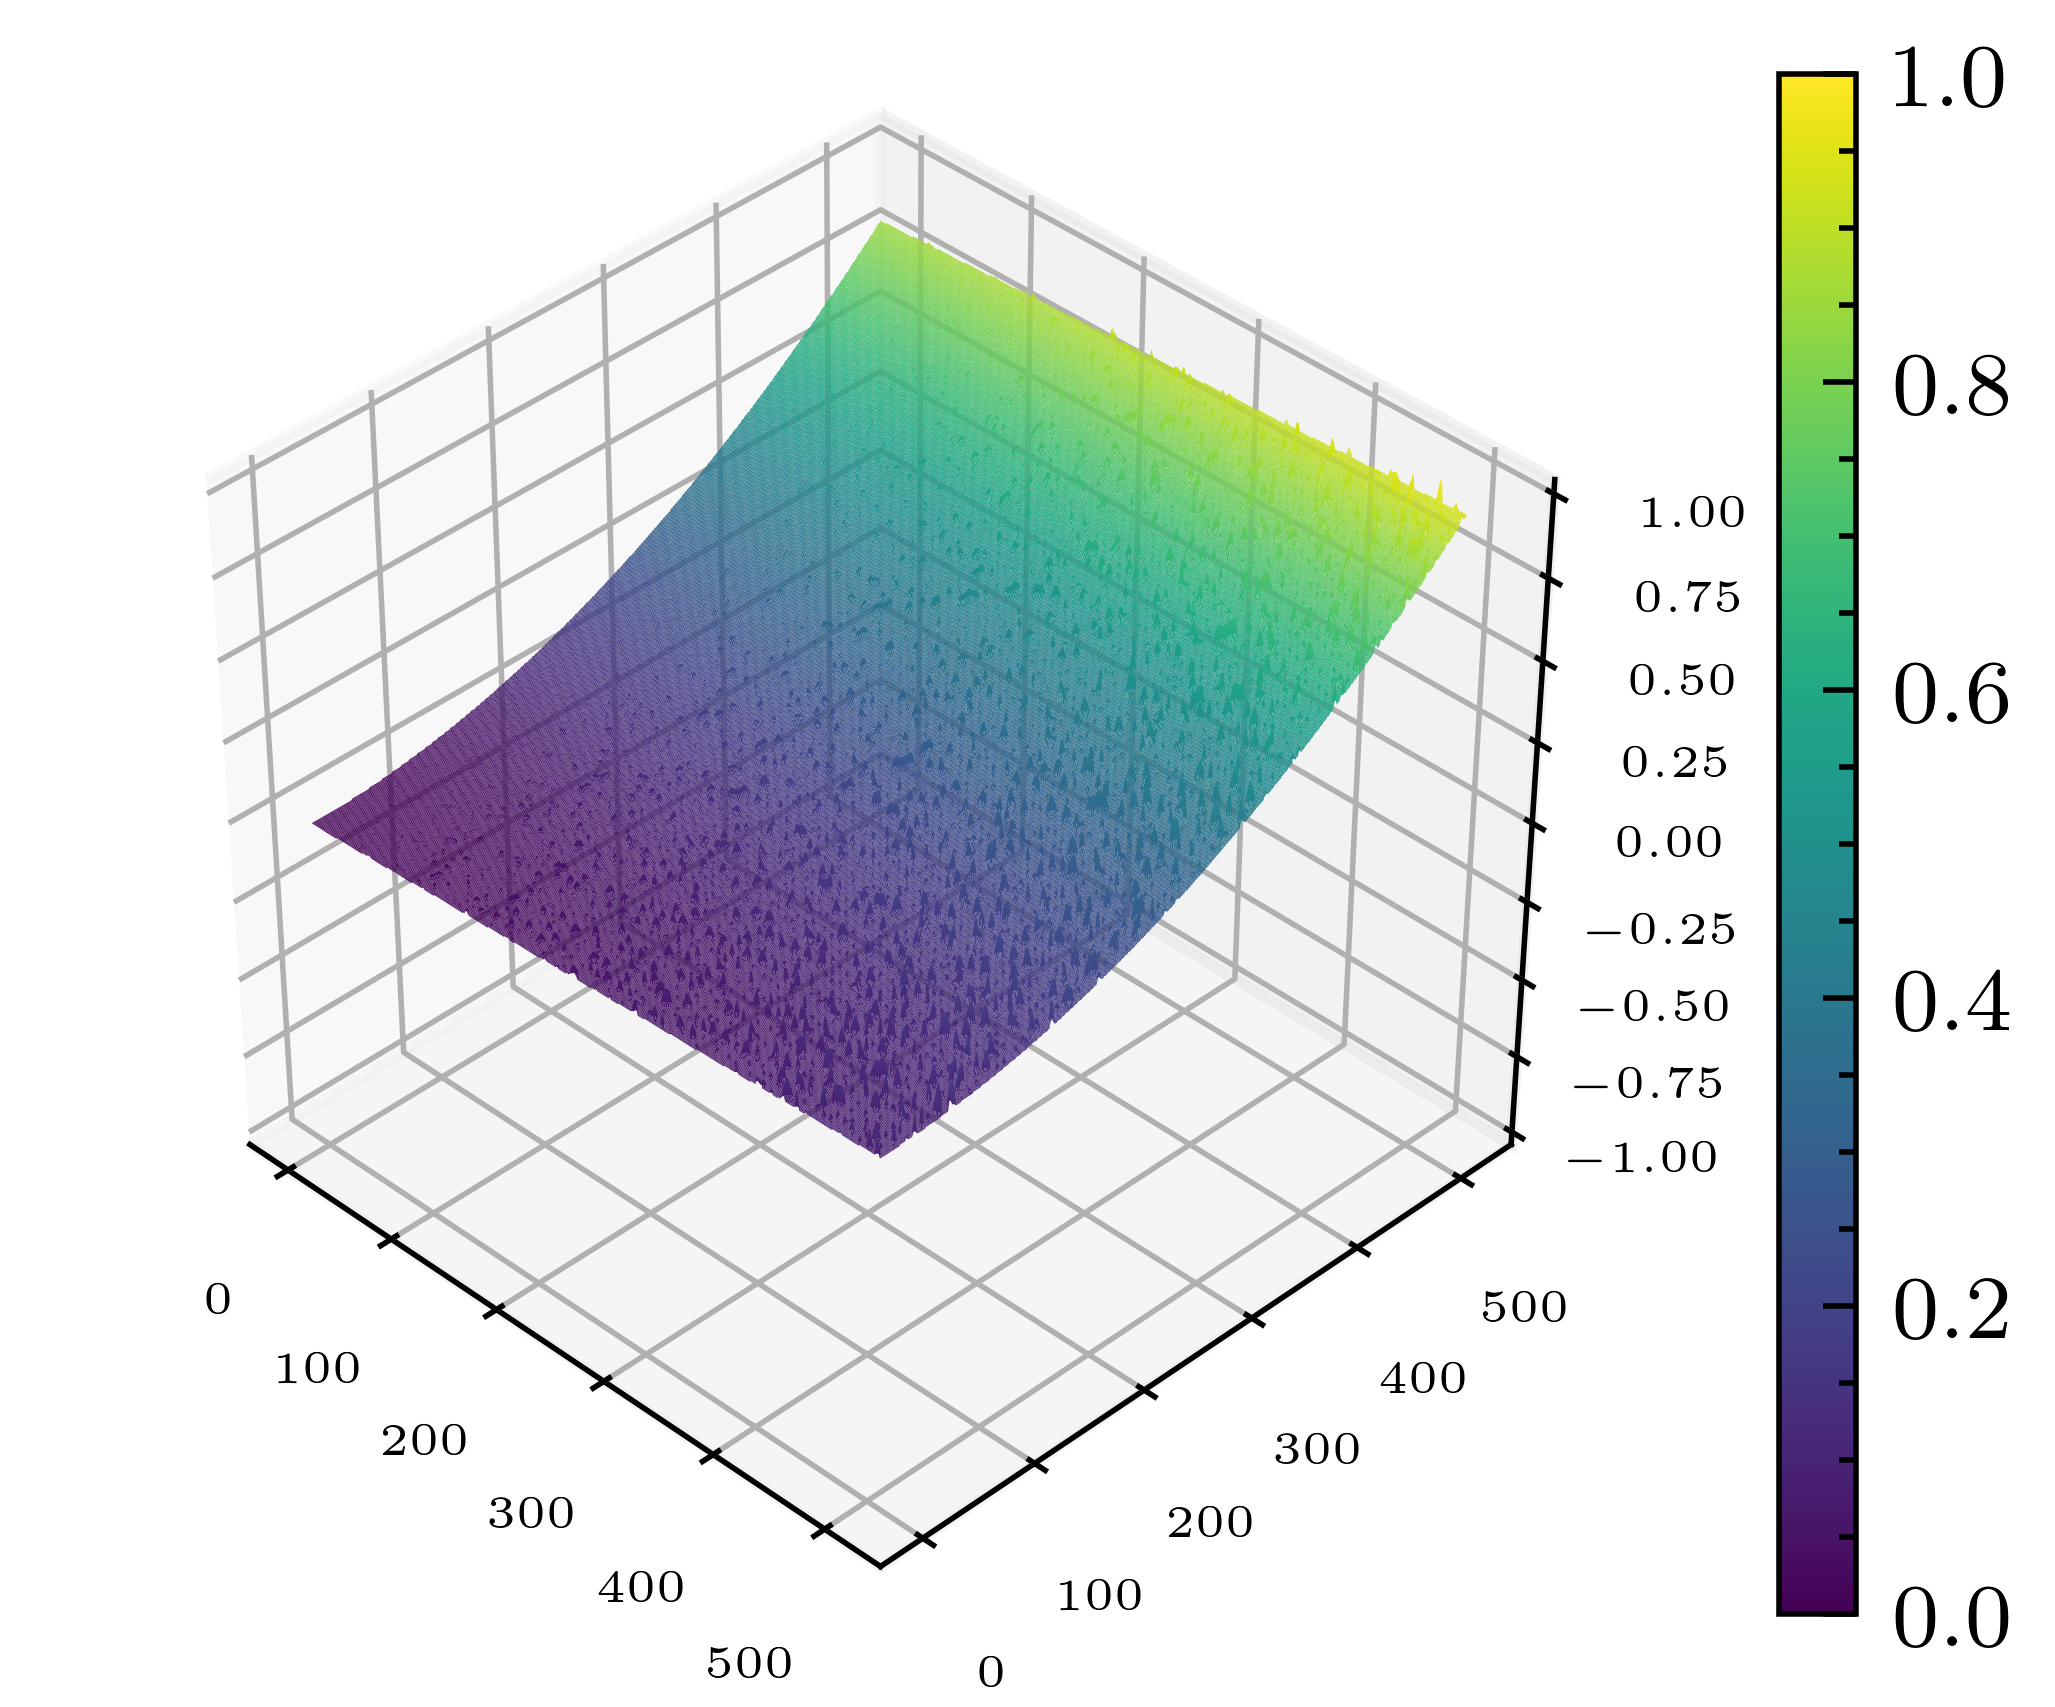

In [ ]:
# matplotlib.rcParams['figure.figsize'] = (5,4)
# matplotlib.rcParams['font.size'] = 6

for hm in hms:
    fig, ax = Patch.from_hm(hmread(hm) / 255).plot3d(title='', colorbar=True, dpi=800, rstride=1, cstride=1)
#     ax.set_aspect(0.5)
#     ax.set_zlim(0, 1)
    ax.view_init(elev=40, azim=-45)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 4, pad=0)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 4, pad=0)
    plt.show()

    fig.savefig('{}/{}'.format(out_dir, hm_name_from_path(hm)),  bbox_inches = "tight", transparent=True)
    

In [ ]:
??matplotlib.axes.Axes.tick_params

In [ ]:
hm_slope = './maps/train/slope_rocks1.png'

In [ ]:
height_factor = 3
fig, ax = Patch.from_hm((hmread(hm) / 255) * height_factor).plot3d(title='', dpi=800,  colorbar=False)
ax.tick_params(axis = 'both', which = 'major', labelsize = 4, pad=0)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 4, pad=0)
plt.show()
fig.savefig('{}/{}-{}'.format(out_dir, height_factor, hm_name_from_path(hm)), bbox_inches='tight', transparent=True)

In [6]:
hm = './maps/test/querry-big-10.png'


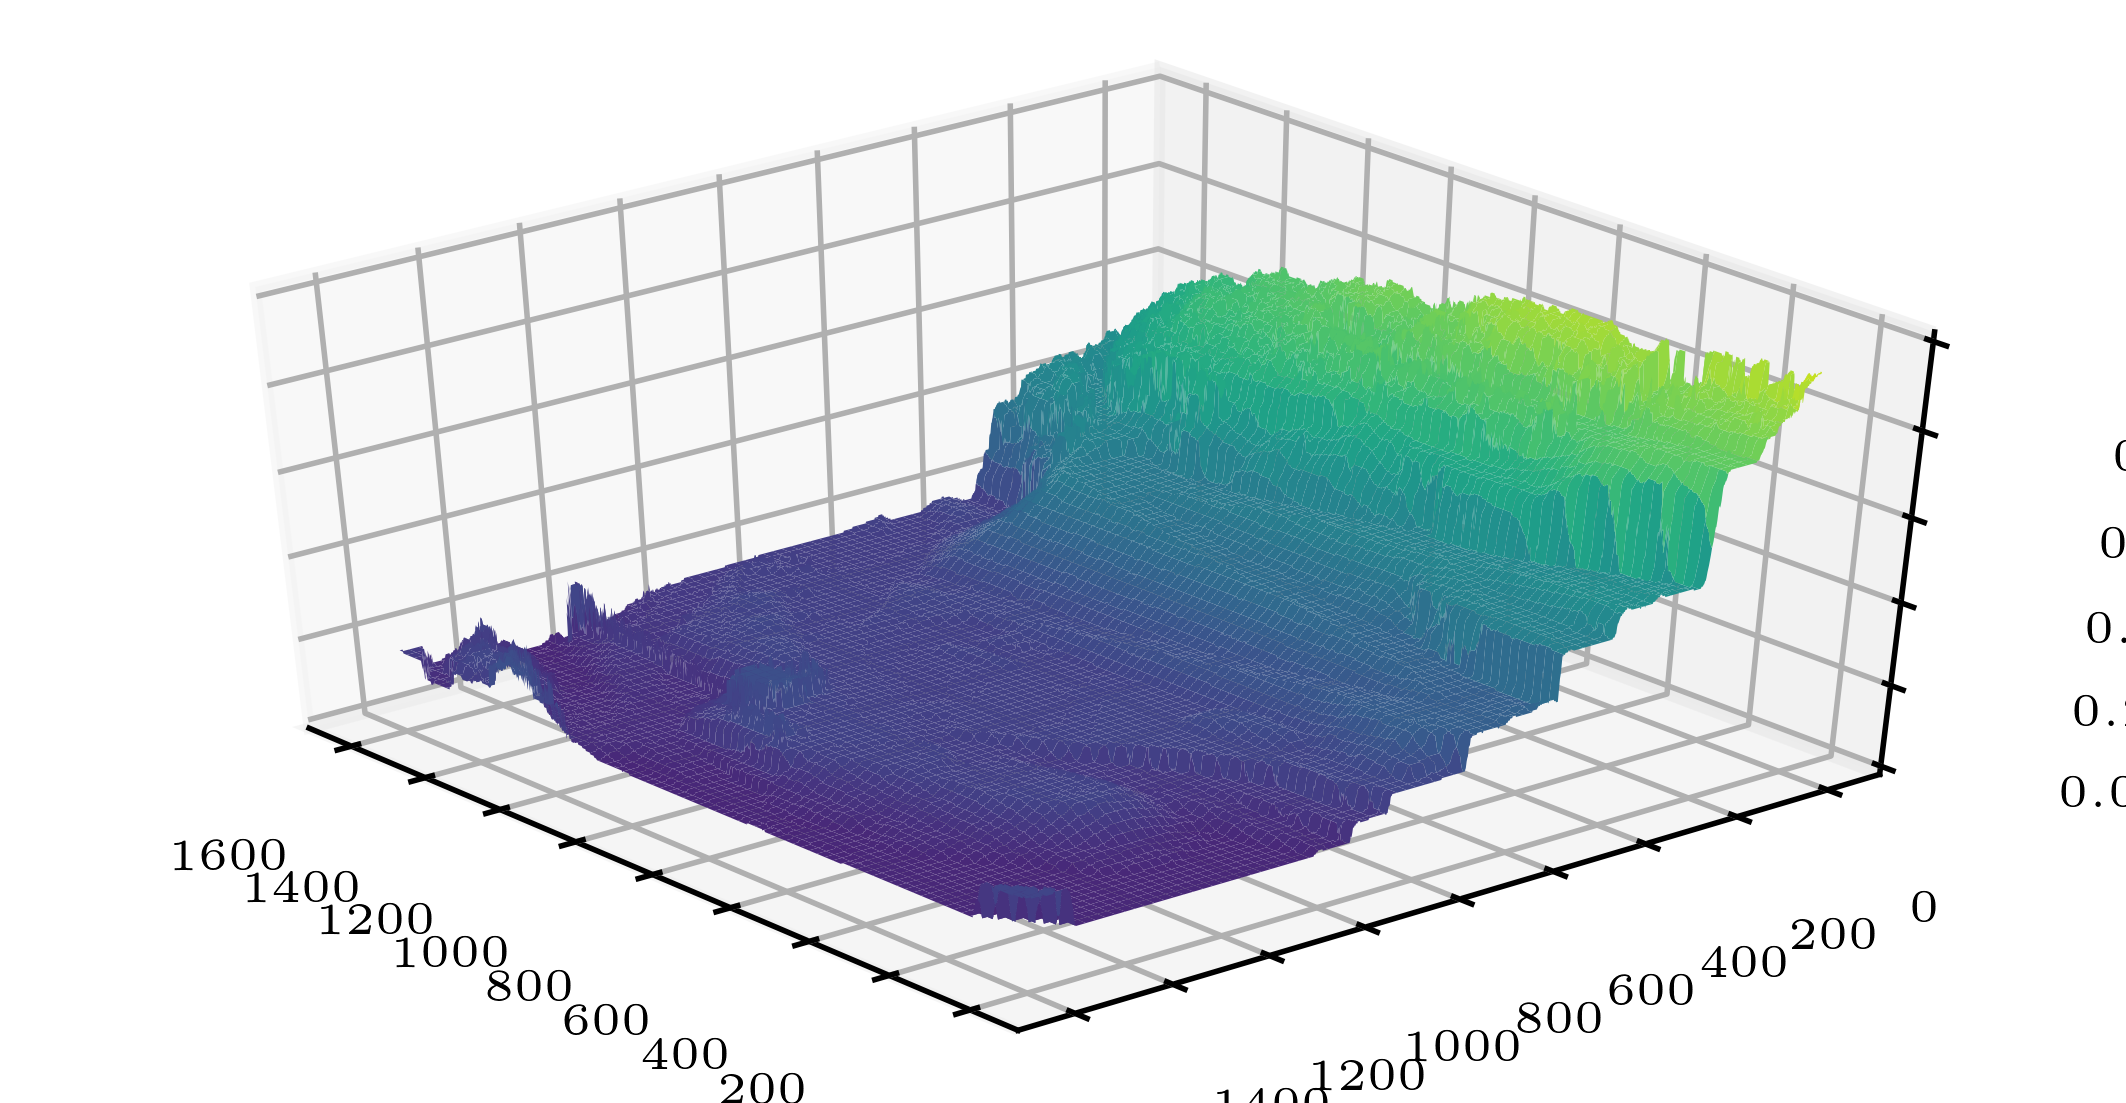

In [51]:
hm = './maps/test/querry-big-10.png'

height_factor = 3
fig, ax = Patch.from_hm((hmread(hm) / 255)).plot3d(title='', dpi=800,  rstride=20, cstride=20, colorbar=False)
ax.set_aspect(0.5)
ax.set_zlim(0, 1)
ax.view_init(elev=40, azim=140)
ax.tick_params(axis = 'both', which = 'major', labelsize = 4, pad=2)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 4, pad=2)
plt.show()
fig.savefig('{}/{}'.format(out_dir, hm_name_from_path(hm)), bbox_inches='tight', transparent=True)

## Patch pictures
### store the patch and map position for some simulations

In [18]:
# %matplotlib notebook
matplotlib.rcParams['figure.figsize'] = (8,8)
fig = plt.figure()
height_factor = 3
fig, ax = Patch.from_hm((hmread(hm) / 255)).plot3d(title='', dpi=800,  colorbar=False)
ax.view_init(elev=20, azim=125)

ax.tick_params(axis = 'both', which = 'major', labelsize = 4, pad=0)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 4, pad=0)
plt.show()
fig.savefig('{}/{}'.format(out_dir, hm_name_from_path(hm)), bbox_inches='tight', transparent=True)

<Figure size 4800x4800 with 0 Axes>

KeyboardInterrupt: 

In [ ]:
from utilities.visualisation import *
from utilities.postprocessing.utils import KrockPatchExtractStrategy

### from the wall map

In [ ]:
df_base_dir = '/media/francesco/saetta/krock-dataset/train/csvs_patches/'
meta = pd.read_csv('/media/francesco/saetta/krock-dataset/train/bags/meta.csv')
meta = meta[meta['map'] == 'bars1']
hm_dir = '/media/francesco/saetta/krock-dataset/train/patches/'

In [ ]:
df = pd.read_csv('{}/{}.csv'.format(df_base_dir, meta['filename'].iloc[0]))
# for some reason map name is missing
df['map_name'] = 'bars1'
hm = hmread('./maps/train/bars1.png')

In [ ]:
df_vis = PatchesAndDataframeVisualization(df,hm, patch_extractor=KrockPatchExtractStrategy)

In [ ]:
%matplotlib notebook
df_vis.show_patches_on_the_map(df=df_vis.df[0:4], compress=False)